In [1]:
import numpy as np
import matplotlib.pyplot as plt

def printmat(M):
    for i in range(len(M)):
        print(M[i])

# Stefaans Grote Matrix-tutorial

# Chapter 1: Het concept

##  Intro

Er zijn veel manieren om matrices te introduceren. We volgen de meest intuitieve: onze matrices zijn lineare afbeeldingen tussen reele eindigdimensionele vectorruimtes. Say what?

We zullen de introductie van matrices daarom doen in 2 stappen: we beschrijven eerst de vectorruimten waartussen ze werken, en dan de matrix-afbeeldingen zelf. 

### Vectorspace

Een reele n-dimensionele vectorruimte is een moeilijke naam voor de verzameling van n-tupels met reele getallen als componenten

In [2]:
n=3
vectorA = np.array( [1,1.3,3.1415926] )
vectorB = np.array( [2,1.7,3.1415926] )

met als eigenschap dat we tupels kunnen optellen en vermenigvuldigen met reele getallen

In [3]:
vectorC = vectorA * 1.2 + vectorB * 2.4

$\vec v_C$ is een $lineaire\ combinatie$ van $\vec v_A$ en $\vec v_B$ en daarom ook een $n-D$ vector. So far so good. 

### Lineaire afbeeldingen

Een lineare afbeelding $F$ tussen vectorruimten maakt van elke n-dimensionele vector een m-dimensionale vector, bijvoorbeeld

In [4]:
m = 2
def F(v):
    return v[:2]
wectorA = F(vectorA)
wectorB = F(vectorB)
wectorC = F(vectorC)

zodat het beeld van lineare combinaties de lineaire combinatie van de beelden is

In [5]:
wectorC = wectorA * 1.2 + wectorB * 2.4

Je kan nagaan dat dit effectief klopt voor $F$. Natuurlijk zijn er veel, veel meer van dergelijke functies. Volgens onze definitie worden ze allemaal voorgesteld door matrices, en ook omgekeerd geeft elke matrix zo'n functie. Why's that?

In [6]:
e0 = np.array( [1,0,0] )
e1 = np.array( [0,1,0] )
e2 = np.array( [0,0,1] )

vectorA = vectorA[0] * e0 + vectorA[1] * e1 + vectorA[2] * e2
wectorA = vectorA[0] * F(e0) + vectorA[1] * F(e1) + vectorA[2] * F(e2)

Je ziet hierboven dat we $\vec w_A$ gevonden hebben door slechts 3 beelden te berekenen: $F(\vec e_1)$, $F(\vec e_2)$ en $F(\vec e_3)$. Met diezelfde 3 wordt $elk$ vectorbeeld gevonden

In [7]:
wectorB = vectorB[0] * F(e0) + vectorB[1] * F(e1) + vectorB[2] * F(e2)
wectorC = vectorC[0] * F(e0) + vectorC[1] * F(e1) + vectorC[2] * F(e2)

$F$ wordt dus volledig bepaald door de volgende gegevens

In [8]:
MT = np.array( [F(e0), F(e1), F(e2)] )
printmat(MT)

[1 0]
[0 1]
[0 0]


Waar eerst alle beelden $\vec w_i$ uit $\vec v_i$ werden gehaald met $F$, gebeurt dat nu met de getallen in $M_t$, die we een matrix noemen. Zoals gezegd, de matrix $M^T$ is equivalent aan een lineaire afbeelding $F$ tussen eindig dimensionele reele vectorruimten. Dat gaat op voor elke lineaire afbeelding $F$!

De manier waarop we $M^T$ gebruiken is hierboven al aangegeven: elk beeld is een lineaire combinatie van de basis-beeldvectoren ${\vec F} (\vec e_0)$, $\vec F (\vec e_1)$ en $\vec F (\vec e_2)$
$$ \vec w_A = v_A[0]\,\vec F (\vec e_0)+v_A[1]\,\vec F (\vec e_1)+v_A[2]\,\vec F (\vec e_2)$$
en zo verder voor alle $\vec w_i$'s. 

De standaard schrijfwijze voor zo'n lineaire combinatie --remember: niets meer dan een som van vectoren met elk eventueel een extra factor-- is als volgt:
$$\vec w_A = \left[v_A[0]\,,v_A[1]\,,v_A[2]\right]\ \cdot\ \left[\begin{array}{c}\vec F (\vec e_0)\\\vec F (\vec e_1)\\\vec F (\vec e_2)\end{array}\right]=\vec v_A\ \cdot\ M^T$$
en analoog voor andere vectoren

In [9]:
wectorA = np.dot( vectorA,MT )
wectorB = np.dot( vectorB,MT )
wectorC = np.dot( vectorC,MT )

We hebben dus het matrix-dotproduct ingevoerd, in dit geval om een vector met een matrix te vermenigvuldigen. Het resultaat is de som van alle rijen van de matrix met de vectorcomponenten als coefficienten
$$ \vec w_A = v_A[0]\,\vec F (\vec e_0)+v_A[1]\,\vec F (\vec e_1)+v_A[2]\,\vec F (\vec e_2)$$
zoals we al hadden gezien.

Denk eraan dat de uitdrukking hierboven een gelijkheid is tussen 2-componentsvectoren. We zouden het resultaat ook kunnen schrijven voor beide componenten:
$$ \vec w_A[0] = v_A[0]\, F (\vec e_0)[0]+v_A[1]\, F (\vec e_1)[0]+v_A[2]\, F (\vec e_2)[0]$$
en
$$ \vec w_A[1] = v_A[0]\, F (\vec e_0)[1]+v_A[1]\, F (\vec e_1)[1]+v_A[2]\, F (\vec e_2)[1]$$

We gaan eens op een zotte quest en gaan 2 nieuwe vectoren maken uit de componenten van de $\vec F(\vec e_i)$'s of --equivalent-- uit de componenten van $M^T$.
$$\vec M_0=[ F (\vec e_0)[0]\,, F (\vec e_1)[0]\,, F (\vec e_2)[0]]$$
en
$$\vec M_1=[ F (\vec e_0)[1]\,, F (\vec e_1)[1]\,, F (\vec e_2)[1]]$$

In [10]:
M0 = np.array( [ F(e0)[0],F(e1)[0],F(e2)[0] ] )
M1 = np.array( [ F(e0)[1],F(e1)[1],F(e2)[1] ] )

Met minimale Math-Sherlock-skills vinden we nu 2 connecties: Ten eerst zijn de vectoren hierboven niets anders dan de kolommen van $M^T$, as you can check. 
$$M^T=[\vec M_0^T,\vec M_1^T]$$
Ten tweede worden de componenten die we hierboven hadden afgeleid, eenvoudig geschreven als
$$\vec w_A[0] = v_A[0]\,M_0[0]+v_A[1]\,M_0[1]+v_A[2]\,M_0[2]=\vec v_A\cdot\vec M_0$$
$$\vec w_A[1] = v_A[0]\,M_1[0]+v_A[1]\,M_1[1]+v_A[2]\,M_1[2]=\vec v_A\cdot\vec M_1$$
of korter:
$$\vec w_A = [ \vec v_A\cdot\vec M_0\,, \vec v_A\cdot\vec M_1]$$

Alweer twee conclusies: Ten eerste heeft onze quest ons een nieuwe schijfwijze opgeleverd voor het beeld $\vec w_A=\vec F(\vec v_A)$, nice! Dat beindigt in feite de inleiding tot matrices als lineaire afbeeldingen. We zijn klaar voor wat technische stuff. Ten tweede... wait, what? ... een dot-product tussen vectoren?

## Dots, dots, dots...

Het is tijd om 'the talk' te hebben. Technical, notational mumbo-jumbo waar we door moeten. 

### Vector dot

We hebben in feite enkel twee manieren gezien om een matrix --die een lineaire afbeelding voorstelt-- te dotten met een vector, wat ultiem hetzelfde was als de originele afbeelding zelf uitvoeren. Methode 1 zei dat het beeld een combinatie van de matrix-rijen was, met de componenten van het origineel als coefficient. Methode 2 zei dat de componenten van het beeld elk een (ander) dot product waren van het origineel met een andere vector, de respectievelijke kolommen van de matrix, as we checked! (Or did you?)

Dat 'ander' dot-product is het bekende dot-product (ook wel $in-product$ of $scalair-product$ of $contractie$) van vectoren van gelijke lengte en de som van producten van overeenkomstige coefficienten.

$$\vec v_A\cdot\vec v_B = v_A[0]v_B[0]+v_A[1]v_B[1]+v_A[2]v_B[2]$$

We gaan direct in op het verband tussen beide dot-producten. Ze zijn -natuurlijk- intrinsiek hetzelfde, maar enkel notationeel licht verschillend.

### Duale dots

Een van de matrix-eigenschappen die we vooropgesteld hebben is dat ze en afbeelding zijn van een $n$-D naar een $m$-D vectorruimte. Dat wordt ook duidelijk uit de structuur van de matrix $M^T$ die $n$ rijen heeft en $m$ kolommen.

In [11]:
printmat(MT)

[1 0]
[0 1]
[0 0]


Een speciaal geval is $m=1$. De matrix (say $N^T$) bestaat dan uit een enkele kolom-vector,

In [12]:
NT = np.array( [[2],[1.7],[3.1415926]] )
printmat(NT)

[ 2.]
[ 1.7]
[ 3.1415926]


 en de afbeelding of dus ons matrix-product genereert een $1-D$ vector aka een getal. 

In [13]:
print(np.dot( vectorA,NT ))

[ 14.07960406]


We hebben niet toevallig de componenten in $N^T$ gelijk gekozen aan die in $\vec v_B$. Het laat ons toe het bovenstaande matrix-dot-product te vergelijken met een vector-dot-product:

In [14]:
print(np.dot( vectorA,vectorB ))

14.0796040644


Unsurprisingly, same thing. Het standaard vector-dot-product is niets anders dan het matrix-dot-product met een 1-kolom matrix aka $getransponeerde$ vector. 

Dat is een heel standaard ding: rij-vectoren, kolom-vectoren, matricesmet slechts 1 rij of kolom zijn allemaal volledig equivalent aan elkaar (de algebraische term is $isomorf$).

Dat zorgt ervoor dat in veel codeertalen die dingen door elkaar worden gebruikt en bijvoorbeeld hetzelfde matrix-dot-product voor vectoren werkt (zoals hier in numpy). Word of caution, niet altijd wordt die sloppyness aanvaard, bijvoorbeeld niet in Matlab.

### Order of things

Een gevolg van de verwisselbaarheid van rij en kolomvectoren is een soort mixed notation. Bear with me, dit is belangrijk. Meestal worden vectoren waarop een matrix inwerkt formeel als kolomvectoren geschreven. In code kunnen we de eenvoudiger rij-notatie gebruiken omdat het verschil -zoals gezegd- toch genegeerd wordt. Maar (!) het betekent dat de standaard volgorde bij de notatie van matrix-afbeeldingen omgekeerd is aan wat we tot hiertoe uit onze rij-vector notatie hebben afgeleid:
$$ \vec w_A = \vec v_A\cdot M^T\quad\Leftrightarrow \vec w_A^T = (M^T)^T\cdot\vec v_A^T$$

De $T$ (transpose) switcht rij-en kolomvectoren en ook de overeenkomstige matrices. Twee keer switchen is natuurlijk hetzelfde als niets doen dus
$$(M^T)^T=M$$

In [15]:
M = np.transpose(MT)
M = MT.T
printmat(M)

[1 0 0]
[0 1 0]


Zo zien we hierboven dat inderdaad de matrix $M$ langs links inwerkt op de kolomvecotr $v_A^T$ terwijl voordien $M^T$ langs rechts op de rijvector $v_A$ inwerkte. Je hoeft het niet te lang te onthouden, het wordt compleet evident in de volgende sectie.

In [16]:
print(np.dot( MT.T,vectorA ))
print(np.dot( vectorA,MT ))

[ 1.   1.3]
[ 1.   1.3]


In deze nieuwe notatie wordt alles omgekeerd: We konden voordien de rijvector $\vec w_A$ schrijven als hetzij een som van rijvectoren met de componenten $v_A[0]$m $v_A[1]$ en $v_A[2]$ als coefficienten:
$$ \vec w_A = v_A[0]\,\vec F (\vec e_0)+v_A[1]\,\vec F (\vec e_1)+v_A[2]\,\vec F (\vec e_2)$$
of -equivalent- als een rij-vector met vector dot-product componenten:
$$\vec w_A = [ \vec v_A\cdot\vec M_0\,, \vec v_A\cdot\vec M_1]$$
Check once again: same thing!

In [17]:
print( vectorA[0]*F(e0)+vectorA[1]*F(e1)+vectorA[2]*F(e2)) 
print( [np.dot(vectorA,M0),np.dot(vectorA,M1)] )

[ 1.   1.3]
[1.0, 1.3]


Omdat we nu een kolom-vector moeten uitkomen, zijn de 3 2-D vectoren $\vec F(e_i)$ nu kolommen en de overeenkomstige matrix van de afbeelding heeft 2 rijen en 3 kolommen, ipv omgekeerd zoals voorheen. De conventie voor rij-vectoren

In [18]:
wectorA = np.dot( vectorA,MT )
printmat(MT)

[1 0]
[0 1]
[0 0]


wordt nu dus vervangen door de kolom-vector notatie

In [19]:
wectorA = np.dot( M,vectorA )
printmat(M)

[1 0 0]
[0 1 0]


die een matrix met dezelfde informatie (want het is dezelfde afbeelding $F$) in een andere orde gebruikt. Vanaf nu werken transformatie-matrices in op vectoren langs de linkerkant, wat standaardnotatie is.

### Chains of dots

Nu we alle mogelijke inwerking van matrices op vectoren begrijpen zijn we klaar om matrices met matrices te combineren. We zijn vertrokken met het idee dat matrix $M$ $n$-D vectoren omzet in $m$-D vectoren. Wat als we nu een andere matrix $K$ hebben die $m$-D vectoren omzet in $k$-D vectoren:
$$\vec w_A = M\cdot \vec v_A$$
$$\vec u_A = K\cdot\vec w_A$$

In [20]:
k=4
K = np.arange(k*m).reshape(k,m)
print('M')
printmat(M)
print('K')
printmat(K)

M
[1 0 0]
[0 1 0]
K
[0 1]
[2 3]
[4 5]
[6 7]


Wat is dan de matrix die $\vec v_A$ omzet in $\vec u_A$? 
$$\vec u_A = K\cdot M\cdot\vec v_A\stackrel{?}{=}L\cdot \vec v_A$$
Blijkt dat $L$ bestaat en --niet onverwacht-- de combinatie van beelden van $M$-kolommen onder de linkse inwerking van $K$ of beelden van $K$-rijen onder de rechtse inwerking van $M$.
$$L = \left[\begin{array}\vec K[0]\cdot M\\\vec K[1]\cdot M\\\vec K[2]\cdot M\\\vec K[3]\cdot M\end{array}\right]$$

of
$$L = [\ K\cdot \vec M[:,0]\ ,\ K\cdot \vec M[:,1]\ ,\ K\cdot \vec M[:,2]\ ]$$
Twee equivalente berekeningswijzen die op hun beurt niets anders zeggen dan een 3e berekeningswijze:

"De $(i,j)$e component van $K\cdot M$ is het vector-dot-product van de $i$e rij van $K$ met de $j$e kolom van $M$."

en dit is de formele definitie van het matrixproduct.

In [21]:
L = np.dot( K,M )
#1e berekening
L = np.array( [np.dot( K[i],M ) for i in range(k)] )
#2e berekening
L = np.array( [np.dot( K,M[:,j] ) for j in range(n)]).T
#3e berekening
L = np.array( [[np.dot( K[i],M[:,j] ) for j in range(n)] for i in range(k)] )
print('L')
printmat(L)

L
[0 1 0]
[2 3 0]
[4 5 0]
[6 7 0]


Om matices te vermenigvuldigen moet dus het aantal kolommen (dimensie van de rij-vectoren) van de linkse gelijk zijn aan het aantal rijen(dimensie van de kolom-vectoren) van de rechtse. Om snel zo'n product uit te voeren nemen we denkbeeldig een ($i$e) rijvector van de linkermatrix, een geroteerde ($j$e) kolomvector van de rechter en leggen die over elkaar zodat we ze kunnen 'dotten'. Dat geeft ons een getal dat we in de overeenkomstige $(i,j)$e positie schrijven.

## Projecties en vierkante Matrices

Om de inleiding te besluiten moeten we nog 2 belangrijke klasses van matrices bespreken. 

### Projecties

Het kan gebeuren dat de 'uitgaande' kolomdimensie van een matrix, die in principe de dimensie vna de beelden bepaald, niet de echte dimensie van beeld is. Een voorbeeld is de projectie $P$ van een willekeurige $2D$ vector op een rechte, pak de eerste bissectrice $x=y$. De projectie rekt uit met het origineel, en een projectie van een som van vectoren is ook de som van projecties, alle voorwaarden voor een lineaire afbeelding en dus is er een matrixvoorstelling van de afbeelding. Hoewel de beelden een $x$- en $y$-component hebben, is het resultaat toch $1$-dimensionaal. 

Let's see. Om de projectie te maken hebben we een eenheidsvector nodig langs de $x=y$ lijn:
$$\vec e = [\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}}]$$
He is evident dat inderdaad $x=y$ en snel gechecked dat het een eenheidsvector is. De lengte van de projectie wordt nu gegeven door het dot-product:
$$P(\vec v)=\vec e\,(\vec e\cdot\vec v)$$
een uitdrukking die we als matrixproduct kunnen schrijven, het is snel gechecked dat de matrix
$$P = \left[\begin{array}{cc}e[0]e[0]&e[0]e[1]\\e[1]e[0]&e[1]e[1]\end{array}\right]=\left[\begin{array}{cc}0.5&0.5\\0.5&0.5\end{array}\right]$$
het voorgaande resultaat geeft. (We misbruiken vanaf nu wat notatie waarbij we dezelfde letter gebruiken voor matrix en afbeelding, anders wordt het alfabet snel te klein). 

In [22]:
wectorE = np.ones((2,)) / np.sqrt(2)
print(wectorE * np.dot(wectorE,wectorA))
print(np.dot( 0.5 * np.ones((2,2)),wectorA ))

[ 1.15  1.15]
[ 1.15  1.15]


Alweer vereist het geen echte Sherlock-skills om in te zien dat het beeld van een willekeurige vector onder P $x$ en $y$ component gelijk zal hebben, zoals bedoeld. Dat betekent omgekeerd dat een heel deel vectoren (die niet op de eerste bissectrice) nooit bereikt worden met een projectie. De eigenlijke dimensie van het beeld is dus 1, terwijl we er toch 2 componentsvectoren uit krijgen. De eigenlijke dimensie van het beeld wordt de $rang$ genoemd. 

### Vierkante matrices

Het veruit meest interessante toepassingsdomein van matrices is het geval waarin ze afbeeldingen van en naar vectorruimten met dezelfde dimensie voorstellen. In dat geval hebben ze evenveel rijen als kolommen en worden ze "vierkante matrices" genoemd. De reden achter die naamgeving is zo complex... you would not understand.

Een eerste extraatje bij vierkante matrices is dat ze oneindig dot-baar zijn, de restrictie dat er evenveel kolommen links als rijen rechts zijn in een matrixproduct vervalt natuurlijk als alle matrices evenveel rijen als kolommen hebben. 

Een 2e extraatje is dat ze soms inverteerbaar zijn. Niet transponeerbaar -dat zijn alle matrices- maar inverteerbaar. Het betekent dat elk origineel met juist een beeld correspondeert en we de omgekeerde bewerking kunnen maken. Het is duidelijk dat voor niet-vierkante matrices, als de dimensie van de beeld-ruimte verschilt van die van het origineel, zoiets onmogelijk is. Maar zelfs in het vierkante geval is inverteerbaarheid niet evident. Precies in het geval van projecties dat we net hebben besproken is dat niet mogelijk. Of anders gezegd: Een $n\times n$ matrix is inverteerbaar als ook de rang gelijk is aan $n$.

Is die inverse dan de getransponeerde? In het algemeen niet, maar soms wel. We zullen extra aandacht besteden aan de klasse van matrices waarvoor dit geldt -isometrieen- maar zeggen nog eens: zeker niet in het algemeen.


# Chapter 2: Application time

We gaan 3 soorten toepassingen bespreken. Matrices kunnen worden gebruikt om stelsels op te lossen in bijvoorbeeld vraagstukken, ze hebben een aantal statistische toepassingen zoals in Markov chains, lineaire regressie of zelfs neurale netwerken en tenslotte de klasse van isometrieen bij geometrische toepassingen

## Lineaire Algebra

"Ik zie 10 koppen, 20 handen en 12 benen, hoeveel paarden, apen en kippen zijn er" Is een klassiek vraagstuk. De vertaling naar een algebraisch stelsel gaat als volgt:
$$\begin{array}{rcl}10&=&p+a+m\\20 &=& 4\,a\\12&=&4\,p+2\,k\end{array}$$
Wat met alle matrix-machinerie die we hebben ook kan geschreven worden als 
$$\left[\begin{array}{c}10\\20\\12\end{array}\right]=\left[\begin{array}{ccc}1&1&1\\0&4&2\\4&0&2\end{array}\right]\cdot\left[\begin{array}{c}p\\a\\k\end{array}\right]$$
om dit stelsel te kunnen oplossen moeten we de matrix inverteren, dat wil zeggen een matrix $A^{-1}$ vinden zodat
$$A^{-1}\cdot A=Id$$

In [23]:
A = np.array([[1,1,1],[4,0,0],[0,4,2]])
telling = np.array([10,20,12])

Om dat te kunnen moeten we eerst bepalen of de matrix $A$ geen projectie is. In dat geval is inverteren niet mogelijk, zoals we al hebben besproken. We hebben dan zowel beelden die geen origineel hebben als beelden die er veel hebben. Om te begrijpen wanneer en hoe we de inversie kunenn doen moeten we eerst een eenvoudiger probleem leren oplossen, een diagonaalmatrix inverteren.

### Diagonaalmatrix

Had ik in het vorige vraagstuk over mensen gehad en gevraagd naar het aantal neuzen, vingers en tenen, dan zag het stelsel er als volgt uit:
$$\left[\begin{array}{c}10\\20\\12\end{array}\right]=\left[\begin{array}{ccc}1&0&0\\0&5&0\\0&0&5\end{array}\right]\cdot\left[\begin{array}{c}n\\v\\t\end{array}\right]$$
De matrix in de vergelijking is een diagonaalmatrix en gemakkelijk te inverteren: de inverse is eenvoudig die diagonaalmatrix van de inversen:
$$\left[\begin{array}{ccc}1&0&0\\0&0.2&0\\0&0&0.2\end{array}\right]\cdot\left[\begin{array}{c}10\\20\\12\end{array}\right]=\left[\begin{array}{c}n\\v\\t\end{array}\right]$$
en het stelsel is snel opgelost. 

In [24]:
B =np.diag([1,5,5])
print('inverse')
printmat(np.linalg.inv(B))
print('result')
print(np.dot(np.linalg.inv(B),telling))

inverse
[ 1.  0.  0.]
[ 0.   0.2  0. ]
[ 0.   0.   0.2]
result
[ 10.    4.    2.4]


De voorwaarde voor inverteerbaarheid is hierbij duidelijk: geen van de diagonaalelementen van de matrix mocht $0$ zijn, en dus mag hun product niet nul zijn. Dat product heet de $determinant$ van de diagonaalmatrix. Het blijkt dat met bijna alle matrices een diagonaalmatrix overeenkomt, zodanig dat de inverse afhangt van de inverse van die diagonaalmatrix. Voor een willekeurige matrix is het product van de diagonaalelementen van de corresponderende diagonaalmatrix ook zijn determinant. De diagonaalelementen zelf worden eigenwaarden genoemd.

Als de determinant 0 is, en de matrix heeft minstens een eigenwaarde die 0 word, dan is de rang niet meer maximaal en is de matrix een (mogelijk geschaalde) projectie. Het betekent dat een aantal componenten van het beeld in een vaste combinatie moeten voorkomen, zoals in ons projectievoorbeeld $x=y$. Voor al die combinaties zijn er oneindig veel originelen, en voor de andere zijn er geen. Dit is meestal niet ideaal om een stelsel op te lossen.

Is de determinant verschillend van 0 is het stelsel wel oplosbaar. Dan kunnen we alle eigenwaarden en daardoor ook de matrix zelf inverteren.

In [25]:
print('inverse')
printmat(np.linalg.inv(A))
print('result')
print(np.dot(np.linalg.inv(A),telling))

inverse
[ 0.    0.25  0.  ]
[-1.    0.25  0.5 ]
[ 2.  -0.5 -0.5]
result
[ 5.  1.  4.]


De juiste berekening van eigenwaarden, determinanten en inversen zullen we op het einde van de tutorial nog eens uit de doeken doen. Dat is een beetje technisch.

## Statistiek

De meeste toepassingen van matrices gaan over vectorruimtes met een zekere symmetrie tussen de dimensies: lengte, hoogte en breedte zijn gelijkwaardige grootheden. Maar dat hoeft niet zo te zijn. 

Stel bijvoorbeeld dat we de afwijking (langs ($a_\parallel$ en loodrecht $a_\perp$) op de as startpositie - put) van een golfbals finale positie na een slag tov de afstand voor de slag ($\Delta$), de ranking van de speler($R$) en de leeftijd van de speler ($L$). We meten dat een heel jaar lang en vinden bijvoorbeeld honderd verbanden 
$$(\Delta,R,L) \mapsto (a_\parallel,a_\perp)\,.$$

We gaan er vanuit dat er een eenoudig universeel $lineair$ recept is om dat verband te implementeren. Een lineaire afbeelding tussen een 3-vector en een 2-vector is volgens onze beschouwingen een matrix, dus we zoeken een verband:
$$\left[\begin{array}{c}a_i^\parallel\\a_i^\perp\end{array}\right]=W\cdot \left[\begin{array}{c}\Delta_i\\R_i\\L_i\end{array}\right]$$ voor alle 100 $i$'s,
met natuurlijk $W$ een $2\times 3$ matrix. 

Het vinden van zo'n linear verband tussen variabelen heet lineaire regressie en naast de matrix $W$ zoals hirboven hangt die regressie in het algemeen nog een constante bias-vector $B$, die voor onze tutorial over matrices niet echt een rol speelt. 

Twee opmerkingen zijn belangrijk. Ten eerste is de bovenstaande vergelijking een voorbeed van een neuraal netwerk. Hoewel zo'n netwerk in het algemeen mer lagen en niet-lineariteit bevat, bevat een eenvoudig lineaire regressie al enkele key-elements: De matrix $W$ bestaat uit 6 gewichten die de 3 input nodes (componenten van onze input-vector) verbinden met de 2 output-nodes (componenten van de output vector). Voor het bepalen van de optimale $W$ bestaan in dit geval wel exacte methdoden in plaats van een iteratieve inferentie zoals bij neurale netwerken.

Ten tweede kunnen we het belang van de matrix-rang hier aantonen. De $2\times 3 $ matrix $W$ heeft maximaal rang 2, wat betekent dat maar 2 lineaire combinaties van $\Delta$, $R$ en $L$ onafhankelijk zullen bijdragen tot $a_\parallel$ en $a_\perp$. Die combinaties worden pricipaalcomponenten genoemd. In het geval van vierkante matrices heten ze ook eigenvectoren, terwijl in dat geval de corresponderende gewichten eigenwaarden zijn. Remember: Eigenwaarden zijn elementen van een diagonaalmatrix die geassocieerd is aan een vierkante matrix, en het bepalen ervan is hetzelfde proces als het bepalen van de principaalcomponenten. Dit is de tweede keer dat we eigenwaarden op een vage manier definieren, later gaan we er dieper op in.

### Geometrie

De meest voor de hand liggende toepassing van lineaire afbeeldingen zijn isomorfismes van de ruimte. We gaan enkel naar 2D en 3D voorbeelden kijken. Met isomorfisme bedoelen we hier dat we een afbeelding toepassen van de ruimte op zichzelf zodat afstanden en grootte van hoeken hetzelfde blijven. Isomorfismes zijn rotaties, spiegelingen en verschuivingen.

Rotaties en spiegelingen zijn lineaire afbeeldingen en kunnen dus als matrix voorgesteld worden. Die matrices hebben de bepalende eigenschap dat hun inverse gelijk is aan hun getransponeerde. Dat is niet moeilijk in te zien. Aangezien afstanden en groottes van hoeken precies bepaald worden door het dot-product, zoeken we de matrices die alle dot-producten onveranderd laten. 
$$(O\cdot \vec v)\cdot (O\cdot \vec v) = \vec v \cdot\vec v$$
We hebben ook al gezien dat het vector-dot-product eigenlijk een matrix-product is tussen een vector en een getransponeerde vector, en dat een links product van een matrix met een kolomvector een rechts product van de getransponeerde. Dus
$$ (O\cdot \vec v)\cdot (O\cdot \vec v) = \vec v\cdot O^T\cdot O\cdot\vec v$$
en het is duidelijk dat $$O^T=O^{-1} \Rightarrow O\cdot O^T=1$$
hiervoor voldoende is. Het blijkt dat als dit waar moet zijn voor alle vectoren $\vec v$ dit ook de enige mogelijkheid is

#### 2D transformaties

Alle orthogonale transformaties in 2D zijn van de vorm
$$O_{rot}\,\quad O_{sp}$$
of een combinatie van dergelijke matrices. 

De matrixvoorstelling van een spiegeling is bijvoorbeeld:

In [26]:
Osp1 = np.diag([1,-1])
a = np.pi / 4
Osp2 = np.array([[np.cos(2*a),np.sin(2*a)],[np.sin(2*a),-np.cos(2*a)]])

v= np.array([2,1])
print(v)
print(np.dot(Osp1,v))
print(np.dot(Osp2,v))

[2 1]
[ 2 -1]
[ 1.  2.]


waarbij $O_{sp,1}$ een spiegeling rond de $X-as$ en $O_{sp,2}$ een spiegeling rond de eerste bissectrice (de rechte $x=y$ of ook nog de rechte onder hoek $\alpha=\frac{\pi}{4}$ - altijd in radialen! ).  Het verband tussen de twee is
$$O_{sp,2} = O_{rot,\alpha}\cdot O_{sp,1}\cdot O_{rot,-\alpha}\,,$$
of: "spiegelen over rechte met hoek $\alpha$ is gelijk aan roteren over $-\alpha$, spiegelen rond de X-as en terug roteren over $\alpha$".

Nu komen de rotaties:

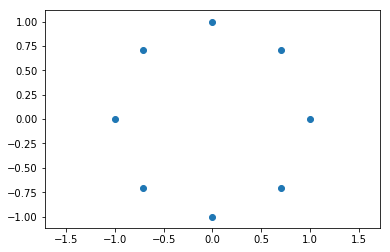

In [27]:
Orot = np.array([[np.cos(a),-np.sin(a)],[np.sin(a),np.cos(a)]])
vs=[np.array([1,0])]
for i in range(7):
    vs += [np.dot(Orot,vs[-1])]
xs = [v[0] for v in vs]
ys = [v[1] for v in vs]

fig,ax = plt.subplots()
ax.scatter(xs,ys)
ax.set_aspect('equal', 'datalim')
plt.show()

Met de ingevoerde rotatie over hoek $\alpha$ (remember $\alpha=\frac{\pi}{4}$) genereert de rotatie inderdaad achtereenvolgens alle punten van een regelmatige achthoek. We kunnen ook testen of de rotatie leidt tot de identiteit tussen de spiegelingen
$$O_{sp,2} = O_{rot,\alpha}\cdot O_{sp,1}\cdot O_{rot,-\alpha}\,,$$

In [28]:
print(Osp2.round(2))
print(np.dot(np.dot(Orot,Osp1),Orot.T).round(2))

[[ 0.  1.]
 [ 1. -0.]]
[[ 0.  1.]
 [ 1.  0.]]


Checks out tot (bijna) machine precision. De redenering is onafhankelijk van de hoek $\alpha$ die we gebruikt hebben. Voor de laatste factor hadden we de rotatie over de tegengestelde hoek nodig, en hebben we identiteit gebruikt:
$$O_{rot,-\alpha}=O_{rot,\alpha}^{-1}=O_{rot,\alpha}^{T}$$
De rechtese identeit hebben we al ontmoet, als fundamentele eigenschap van isometrie\"en wat rotaties zeker zijn, en de rest kan expliciet gechecked worden rekening houdend met even/oneven karakter van cos/sin.


#### 3D isometrieen

Over spiegelingen in 3D kunnen we kort zijn: Een spiegeling door het XY-vlak wordt bepaald door

In [29]:
Ospxy = np.diag([1,1,-1])
print(Ospxy)

[[ 1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


en alle andere spiegelingen zijn geroteerde versies daarvan. Een spiegeling over achtereenvolgens XY, YZ en ZX vlak wordt zo gegeven door 
$$O_{sp3}=\left[\begin{array}{ccc}-1&0&0\\0&-1&0\\0&0&-1\end{array}\right]$$
en is een combinatie van de spiegeling om een vlak en een rotatie van 180 graden rond zijn normaalvector.

Rotaties dan. Elke rotatie wordt gegeven door niet 1 maar 2 hoeken. Als we ons daarboven ook beperken tot rotaties over X, Y of Z as hebben we nog een extra hoek nodig. De individuele rotaties zijn dan identiek aan de 2D versie, maar met een extra rij en kolom in de matrix met een 1 op de diagonaal.

In [30]:
def rot3(angles):
    [a,b,c]=angles
    X = np.eye(3,3)
    X[1:,1:]=np.array([[np.cos(a),-np.sin(a)],[np.sin(a),np.cos(a)]])
    Z = np.eye(3,3)
    Z[:2,:2]=np.array([[np.cos(c),-np.sin(c)],[np.sin(c),np.cos(c)]])
    Y = np.eye(3,3)
    Y[-1::-2,-1::-2] = np.array([[np.cos(b),-np.sin(b)],[np.sin(b),np.cos(b)]])
    M = np.dot(Z,np.dot(Y,X))
    return M

Voor rotaties over 90 graden rond de verschillende assen vinden we bijvoorbeeld:

In [31]:
X=rot3([np.pi / 2,0,0])
Y=rot3([0,np.pi / 2,0])
Z=rot3([0,0,np.pi / 2])
v=np.array([1,0,0])
print(np.round(X,2))
print(np.dot(X,v).round(2))
print(np.round(Y,2))
print(np.dot(Y,v).round(2))
print(np.round(Z,2))
print(np.dot(Z,v).round(2))

[[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]
[ 1.  0.  0.]
[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [-1.  0.  0.]]
[ 0.  0. -1.]
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]
[ 0.  1.  0.]


#### Toepassing: cross product

Een vereenvoudiging treedt op als we over kleine hoeken roteren. De rotatiematrix is dan ongeveer de identiteit plus een correctie lineair in die hoeken, terwijl in het algemeen geval het verband trigonometrisch en dus zeker niet lineair is!

In [32]:
w=np.array([0.01,0.02,0.03])
M=rot3(w)
print(M.round(2)-np.eye(3,3))

[[ 0.   -0.03  0.02]
 [ 0.03  0.   -0.01]
 [-0.02  0.01  0.  ]]


Laten we die kleine correctie -rotatie min de identiteit- inwerken op een vector, krijgen we een nieuwe vector. Op die manier definieren we een nieuwe bewerking linear in 2 vectoren die een 3e vector geeft. Unsurprisingly is dat het cross-product.

In [33]:
v=np.array([1,1,1])
v2=np.dot(M-np.eye(3,3),v)
v3=np.cross(w,v)
print(v2.round(2))
print(v3.round(2))

[-0.01  0.02 -0.01]
[-0.01  0.02 -0.01]


Het is duidelijk dat het parallel stuk tussen rotatie en geroteerde vector geen invloed mag hebben en de correctie verdwijnt dus bij parallelle vectoren. Uit de matrixvoorstelling volgen ook alle andere cross-product eigenschappen: verwisselen van vectoren geeft een minteken, het resultaat staat loodrecht op de gegeven vectoren en de grootte van het resultaat is sinus van de ingesloten hoek. Dat is logisch omdat de parallelle componenten zoals gezegd niet bijdragen, en de loodrechte componenten bijdragen met een sinus-fractie. 



## Complexe geometrie

We hebben gezien dat rotaties in 2D de structuur 
$$ O_{rot,\alpha}=\cos\alpha\,\left[\begin{array}{cc}1&0\\0&1\end{array}\right]+\sin\alpha\,\left[\begin{array}{cc}0&-1\\1&0\end{array}\right]=\cos\alpha\cdot 1+\sin\alpha\cdot I$$
hebben, waarbij de matrix $1$ alle eigenshcappen van het getal 1 heeft, maar de matrix $I$ is bijzonder. Als we ook $I$ konden identificeren met een soort getal werd rekenen met 2D rotaties een pak eenvoudiger, zonder matrices. Het enige het enige wat we nodig hebben voor zo'n "scalaire" voorstelling van de 2D matrices, zijn de producten
$$ 1\cdot 1=1\,,1\cdot I=I\,, I\cdot 1 = I\,,I\cdot I = -1$$
Met die rekenregels kunnen we alle rotaties samenstellen, hoe ingewikkeld ook. We kunnen ook de vector $(x,y)$ voorstellen als (de eerste kolom van) $x+I\cdot y$ en zo rotaties uitvoeren door de nieuw gedefinieerde productregels. Het resultaat geeft dan een nieuwe vector: (de eerste kolom van) $x'+I\cdot y'$

De nieuwe algebra waarbij we een getal hebben dat kwadrateert tot $-1$ heet de complexe getallen. Zoals je kan nagaan is de matrix $I$ een rotatie over 90 graden en tweemaal toegepast geeft die inderdaad het tegengestelde. Als de algebra los van matrices wordt gebruikt noteren we $I$ meestal als $i$. In principe laat de algebra ons toe in 2D te rekenen zonder matrices. Alle Complexe getallen komen dan overeen met een vector, terwijl alle unitaire complexe getallen (van de vorm $\cos\alpha+i\,\sin\alpha$) overeen komen met rotaties.

In 3D kan je iets gelijkaardig doen. Er bestaat een constructie (associatieve ring) met 3 getallen die kwadrateren tot $-1$:
$$i^2=j^2=k^2=-1$$ 
zodat 
$$ij=k\,,jk=i\,,ki=j\,,ji=-k\,,kj=-i\,,ik=-j\,,$$
Vaag komen i,j en k overeen met met weer een rotatie over 90 graden, maar niet helemaal. Getallen van de vorm
$$a+b\, i+c\, j+d\, k$$
worden quaternionen genoemd en als we quaternionen van de vorm
$$v_x\,i+v_y\,j+v_z\,k$$identificeren met een vector $\vec v$ terwijl we rotaties over $\theta$ rond de vector $\vec n$ voorstellen als unitaire quaternionen:
$$\cos\frac{\theta}{2}+\sin\frac{\theta}{2}\left(n_x\,i+n_y\,j+n_z\,k\right)$$
reproduceren we de hele 3D rotatie-algebra. 

# Chapter3: Technicalities

Bijna elke vierkante matrix kan worden voorgesteld in de vorm
$$M=S\cdot D\cdot S^{-1}$$
waarbij $D$ een diagonaalmatrix is. Voor symmetrische matrices is dat zelfs sterker:
$$M=O\cdot D\cdot O^T$$
met $O$ een orthoganale matrix, een rotatie dus. Dit kan geinterpreteerd worden als "elke symmetrische matrix is een geroteerde versie van een uitrekking langs loodrechte assen". De uitrekkingsfactoren zjn precies de elementen op de diagonaal van $D$. In het algemenere niet symmetrisch geval hoeven die assen dus niet loodrecht te zijn.

De assen waarlangs de matrix $M$ een gewone uitrekking wordt worden eigenvectoren genoemd. Als voor 2 (of meer) assen dezelfde uitrekkingsfactor geldt, heet het opgespannen vlak een eigenruimte. De uitrekkingsfactoren zelf heten eigenvectoren. 

Het product van de eigenvectoren is de determinant. In tegenstelling tot de eigenvectoren en -waarden, kan de determinant bepaald worden door eenvoudige bewerkingen. Het eigenstelsel (waarden + vectoren) daarentegen vind je pas na het oplossen van vergelijkingen, en dat is aanzienlijk moeilijker. Dat betekent wel dat je kan te weten komen of een van de eigenwaarden 0 is (want dan is de determinant zeker ook 0 en omgekeerd) zonder het stelsel op te lossen.

Als minstens een eigenwaarde 0 is, is de rank niet meer gelijk aan de dimensie waarin we werken. We hebben dat geillustreerd bij de projectie-toepassingen. Sommige vectoren zijn dan nooit een beeld van de matrix-afbeelding. Sommige vectoren worden ook op dezelfde vector afgebeeld, zodat informatie verloren gaat. Het is duidelijk dat de matrix dan niet inverteerbaar kan zijn, want die zou die het verloren onderscheid tussen vectoren met hetzelfde beeld moeten terugtoveren. Impossibru!

In het geval dat geen eigenwaarden 0 zijn en dus de determinant niet 0 is, is de matrix altijd wel inverteerbaar en maximale rang. Dit is zo bij rotaties (determinant 1) spiegelingen (determiant -1) en meestal het geval dat we liefst hebben. 

## Determinant

We spitsen ons enkel toe op 2D en 3D. De determinant bepalen is dan relatief eenvoudig:
$$\det\left[\begin{array}{cc}a&b\\c&d\end{array}\right] = ad-bc$$
en 
$$\det\left[\begin{array}{ccc}a&b&c\\d&e&f\\g&h&i\end{array}\right] = aei+dhc+bfg-(gec+dbi+ahf)$$
Zoals gezegd: geen moeilijke bewerkingen en dit vertelt direct of het stelsel regulier ($det\neq 0$) of singulier ($det = 0$) is. 

In [34]:
A=np.array([[43,0,-24],[0,50,0],[-24,0,57]])/25
print(A)
print(np.linalg.det(A))

B=np.arange(4).reshape((2,2))
print(B)
print(np.linalg.det(B))

[[ 1.72  0.   -0.96]
 [ 0.    2.    0.  ]
 [-0.96  0.    2.28]]
6.0
[[0 1]
 [2 3]]
-2.0


## Eigenwaarden

Het eigenstelsel van $M$ oplossen is het vinden van alle paren $(\lambda_i,\vec v_i)$ zodat $\vec v_i$ de richting is waarin $M$ een eenvoudige herschaling wordt.
$$M\cdot\vec v_i = \lambda_i\vec v_i$$
Dat betekent dat voor elk zo'n $\lambda_i$ de matrix $M-\lambda\, Id$ een $0$ eigenwaarde heeft, en dus 
$$\det(M-\lambda_i\, Id)=0$$
Omgekeerd zijn alle oplossingen van dat stelsel precies de eigenwaarden. Aangezien we de determinant gemakkelijk kunnen berekenen, is het vinden van die vergelijking eenvoudig. Oplossen is soms iets moeilijker met de hand, maar numeriek geen enkel probleem.

In [35]:
print(np.linalg.eigvals(A))

[ 1.  3.  2.]


In [36]:
O=np.array([[4,0,3],[0,5,0],[3,0,-4]])
D=np.diag([1,2,3])
M=np.dot(O,np.dot(D,O.T))
print(M)

[[ 43   0 -24]
 [  0  50   0]
 [-24   0  57]]


## Eigenvectoren

Eens we de eigenwaarden $\lambda_i$ gevonden hebben kunnen we voor elk de corresponderende eigenvector bepalen. Het oplossen van het stelsel
$$\det(M-\lambda_i\, Id)\cdot\vec v_i=0$$
is speciaal omdat de matrix -per constructie- singulier is. Dat betekent dat het een soort projector is en dus dat meerdere vectoren op $0$ worden afgebeeld, die moeten we vinden. Er zijn veel truukjes voor, gezond verstand helpt ook. Een manier is het schrappen van een rij van de matrix en de deeldeterminanten van de resterende $1\times 2$ of $2\times 3$ matrix te gebruiken. Dat werkt "meestal": je wil dat de resterende matrix dan maximale rang heeft.

In [37]:
v = np.zeros((3,3))
lda = [1,2,3]
for i in range(3):
    M = A - lda[i]*np.eye(3,3) 
    Mred=np.array([M[0], M[2]]).T if i==1 else M[:-1].T
    v[i] = np.array([np.linalg.det(Mred[cols])  for cols in [[1,2],[2,0],[0,1]]])
print(v[0].round(2))
print(v[1].round(2))
print(v[2].round(2))

[ 0.96  0.    0.72]
[ 0.  1.  0.]
[-0.96  0.    1.28]


We vinden hetzelfde met ingebouwde functies, al zet die de eigenwaarden in een andere volgorde

In [38]:
print(np.linalg.eig(A)[0])
print(np.linalg.eig(A)[1].T)

[ 1.  3.  2.]
[[-0.8  0.  -0.6]
 [ 0.6  0.  -0.8]
 [ 0.   1.   0. ]]


De vectoren geven enkel een richting aan een zijn dus bepaald op een voorfactor na. Meestal wordt die zo gekozen dat de vectoren genormalizeerd zijn. Dat laat ons toe er een isometrie uit te maken

In [39]:
for i in range(3):
    v[i] /= np.linalg.norm(v[i])

Nu is de cirkel rond, we hebben eigenvectoren gedefinieerd als krakteristieke herschalingsfactoren die ook in een diagonaalvorm van een matrix terug te vinden zijn. De eigenvecotren bepalen nu precies het geroteerde assenstelsel waar de matrix een herschaling is langs de assen en dus een diagonaalvorm heeft.

De rotatie matrix $O$ is nu gemakkelijk te vinden, hij heeft de eigenvectoren als kolommen:

In [40]:
O=v.T
D=np.diag([1,2,3])
print(np.dot(np.dot(O,D),O.T))

[[ 1.72  0.   -0.96]
 [ 0.    2.    0.  ]
 [-0.96  0.    2.28]]


We zien dat met de formule $$M=O\cdot D\cdot O^T$$ voor symmetrische matrices inderdaad is voldaan. Als de matrix niet symmetrisch was of de eigenvectoren niet genormaliseerd zijn, moeten we de inverse in plaats van de getransponeerde gebruiken.

## Inverse

We hebben al bij de toepassingen al gezien dat een inverse kan helpen om vergelijkigen op te lossen. We hebben toen ook gezegd dat de inverse van een diagonaalmatrix, de diagonaalmatrix van de inversen is. 

In [41]:
Dinv = np.linalg.inv(D)
print(Dinv)

[[ 1.          0.          0.        ]
 [ 0.          0.5         0.        ]
 [ 0.          0.          0.33333333]]


Je zou kunnen denken dat we nu gemakkelijk ook de inverse van $A$ kunnen berekenen, door eenvoudig dezelfde rotatie voor en na $D_{inv}$ te doen als voorheen. Dat zou volledig correct zijn:
$$A^{-1} = O\cdot D^{-1}\cdot O^T$$
Waar we voorheen $A$ roteerden naar het stelsel waar het een hershcaling is langs de assen, en dan terug, brengt dezelfde rotatie ons in een stelsel waar we de inverse herschaling kunnen doen.

In [42]:
Ainv=np.dot(np.dot(O,Dinv),O.T)
print(Ainv)
print(np.linalg.inv(A))

[[ 0.76        0.          0.32      ]
 [ 0.          0.5         0.        ]
 [ 0.32        0.          0.57333333]]
[[ 0.76        0.          0.32      ]
 [ 0.          0.5         0.        ]
 [ 0.32        0.          0.57333333]]


Het spreekt voor zich dat de determinant niet nul kan zijn als we willen inverteren, en we zien ook duidelijk dat in dat geval een $1/0$ verschijnt in de diagonaalmatrix. Er bestaat een formule om de inverse van een matrix te vinden zonder het eigenstelsel op te lossen, op dezelfde manier als we de determinant konden vinden zonder de eigenwaarden uit te rekenen. We gaan de algemene formule overslaan, maar geven wel het 2D en 3D geval:
$$\left[\begin{array}{cc}a&b\\c&d\end{array}\right]^{-1}=\frac{\left[\begin{array}{cc}d&-b\\-c&a\end{array}\right]}{ad-bc}$$
and 
$$\left[\begin{array}{ccc}a&b&c\\d&e&f\\g&h&i\end{array}\right]^{-1} = \frac{\left[\begin{array}{ccc}ei-hf&gf-di&dh-ge\\hc-bi&ai-gc&gb-ah\\bf-ec&dc-af&ae-db\end{array}\right]}{aei+dhc+bfg-(gec+dbi+ahf)}$$

## Stelsel van Cramer

Als we de inverse loslaten op een vector worden de bovenstaande formules eenvoudiger.